## Notes
Because the Earth's axis is tilted, by $23.5^{\circ}$, the path of the Sun in your sky changes dramatically throughout the year as Earth orbits around the Sun. Knowing the latitude allows us to predict where the axis would point, and the given date predicts the declination of the Sun. (Declination is the angular distance of a point North or South of the celestial equator).

| Date |   Declination of the Sun  |
|------| ------|
|   Mar 21st  | $0 ^{\circ}$ |
|   Jun 21st  | $+23.5 ^{\circ}$ |
|   Sep 21st  | $0 ^{\circ}$ |
|   Dec 21st  | $-23.5 ^{\circ}$ |

And the calculated declination is how much the path of the Sun would appear to be shifted by in the sky. (For example, on June 21st, the path of the Sun is shifted up along the axis by $23.5^{\circ}$, drawing the biggest arc in the sky and making it the longest day of the year).

A sundial is a device that tells the time of day by casting a shadow onto a flat plate (the dial). One important thing in building a sundial is that the gnomon (the part that casts a shadow) must point at the North Star, so the plate is parallel to the arc that the Sun draws as it moves across the sky. 


----------------------------------
##  Inputs
This program takes a latitude and date as inputs. <br>
Latitude must be entered in degrees, and the date must be entered in the form of 'mm/dd'. <br>

_Note: It only considers locations in the Northern Hemisphere (i.e. latitude > 0)_

----------------------------------
## Outputs
This program outputs three figures.
1. Maximum altitudes of the Sun throughout the year at a given location
2. The path that the Sun takes throughout the entered day
3. A clock that updates every minute corresponding to the position of the Sun in the sky <br>

----------------------------------
#### (Scroll down for the test cases.) 

<br>

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
def inputs():
    
    lat = float(input('Enter the latitude [in degrees]: '))
    date = input('Enter the date [in mm/dd form]: ')
    
    daysMonth = {'1':31, '2':28, '3':31, '4':30, '5':31, '6':30, '7':31, '8':31, '9':30, '10':31, '11':30, '12':31}
    ind = date.index('/')
    months = date[:ind]
    days = date[ind+1:]
    
    totDays = 0
    for m in range(1, int(months)):
        totDays += daysMonth[str(m)]
    totDays += int(days)
    
    decSun = 23.5*np.sin(2*np.pi/365*(totDays-75.75))
    
    return date, lat, decSun

In [3]:
def sunDial():

    date, lat0, decSun = inputs()
    
    # Altitude of the Sun throughout the year at given location
    fig0 = plt.figure(figsize=(5,3))
    ax0 = fig0.add_subplot(111)
    plt.ylim(-10, 110)
    ax0.grid(True)
    d = np.linspace(1, 365, 365)
    dcl = (90-lat0) + 23.5*np.sin(2*np.pi/365*(d-75.75))
    plt.plot(d, dcl)
    plt.suptitle('Altitude of the Sun at local noon at latitude: ' + str(lat0) + ' N', fontsize=13)
    plt.xlabel('days', fontsize=11)
    plt.ylabel('altitude [degrees]', fontsize=11)
    
    ############################################################
    Nt = 60*24   # every minute

    lat = -lat0/180*np.pi
    decSun = decSun/180*np.pi

    # initialization for path of the Sun
    u = np.linspace(0, 2*np.pi, Nt+1)
    v = np.linspace(0, np.pi/2, Nt+1)
    U = np.linspace(0, 2*np.pi, 100)
    V = np.linspace(0, np.pi/2, 100)

    # prepares vectors for the path in 3D
    a = np.array([-np.sin(lat), 0, np.cos(lat)])
    b = np.array([0, 1, 0])

    R0 = 2   # here R0 is an arbitrary value
    x = R0*( a[0]*np.sin(u) + b[0]*np.cos(u) )
    y = R0*( b[1]*np.cos(u) )
    z = R0*( np.sin(decSun) + a[2]*np.sin(u)+b[2]*np.cos(u) )

    # hemisphere
    maxz = max(z)
    indMaxz = np.where(z==maxz)
    indMaxz = int(indMaxz[0])

    # radius of the hemisphere set by the maximum altitude of the sun
    R = np.sqrt(x[indMaxz]**2 + y[indMaxz]**2 + z[indMaxz]**2)
    X = R * np.outer(np.cos(U), np.sin(V))
    Y = R * np.outer(np.sin(U), np.sin(V))
    Z = R * np.outer(np.ones(np.size(U)), np.cos(V))

    # path of the Sun above the horizon
    if min(z) < 0:
        indBelow = np.where(z<0)
        indBelow = list(indBelow[0])
        indBelow1 = indBelow[0]
        indBelow2 = indBelow[-1]
        indAbove = np.where(z>0)
        indAbove = list(indAbove[0])
    
    #######################################################################
    # figure 1: path of the sun
    def updateSun(n):
        ax1.clear()
        [x0, y0, z0] = [-R*abs(np.cos(lat)), 0, R*abs(np.sin(lat))]
        m0 = abs(np.tan(lat))
        ax1.plot([x0,x0-0.3], [y0,y0], [z0,z0+0.3*m0], color='darkgrey')
        ax1.plot([x0,0], [y0,y0], [z0,0], color='snow', linestyle = 'dashed')
        ax1.text(x0-0.85, 0, z0+0.35*m0, 'NorthPole', color='dimgrey', size=11.5)
        ax1.text(-R-0.2, 0, 0, 'N', color='dimgrey', size=11.5)
        ax1.text(R+0.2, 0, 0, 'S', color='dimgrey', size=11.5)
        ax1.text(0, R+0.2, 0, 'E', color='dimgrey', size=11.5)
        ax1.text(0, -R-0.2, 0, 'W', color='dimgrey', size=11.5)
        if decSun > 0:
            if (n > indBelow2) and (n < (indBelow2+50)):
                ax1.plot_surface(X, Y, Z,  rstride=4, cstride=4, color='hotpink', linewidth=0, alpha=0.15)
                ax1.plot(x[:indBelow1], y[:indBelow1], z[:indBelow1], color='mistyrose', linestyle = 'dashed')
                ax1.plot(x[indBelow2:], y[indBelow2:], z[indBelow2:], color='mistyrose', linestyle = 'dashed')
                ax1.plot([x[n]], [y[n]], [z[n]], marker="o", color='red', markersize=7)
                fig1.canvas.draw()
            elif (n > 0)  and (n < (indBelow2+50-Nt)):
                ax1.plot_surface(X, Y, Z,  rstride=4, cstride=4, color='hotpink', linewidth=0, alpha=0.15)
                ax1.plot(x[:indBelow1], y[:indBelow1], z[:indBelow1], color='mistyrose', linestyle = 'dashed')
                ax1.plot(x[indBelow2:], y[indBelow2:], z[indBelow2:], color='mistyrose', linestyle = 'dashed')
                ax1.plot([x[n]], [y[n]], [z[n]], marker="o", color='red', markersize=7)      
            elif (n > (indBelow1-70)) and (n < indBelow1):
                ax1.plot_surface(X, Y, Z,  rstride=4, cstride=4, color='hotpink', linewidth=0, alpha=0.15)
                ax1.plot(x[:indBelow1], y[:indBelow1], z[:indBelow1], color='mistyrose', linestyle = 'dashed')
                ax1.plot(x[indBelow2:], y[indBelow2:], z[indBelow2:], color='mistyrose', linestyle = 'dashed')
                ax1.plot([x[n]], [y[n]], [z[n]], marker="o", color='red', markersize=7)      
            else:
                ax1.plot_surface(X, Y, Z,  rstride=4, cstride=4, color='dodgerblue', linewidth=0, alpha=0.15)
                ax1.plot(x[:indBelow1], y[:indBelow1], z[:indBelow1], color='mistyrose', linestyle = 'dashed')
                ax1.plot(x[indBelow2:], y[indBelow2:], z[indBelow2:], color='mistyrose', linestyle = 'dashed')
                ax1.plot([x[n]], [y[n]], [z[n]], marker="o", color='yellow', markersize=7)
                fig1.canvas.draw()
        else:
            if (n > indAbove[0]) and (n < indAbove[0]+50):  
                ax1.plot_surface(X, Y, Z,  rstride=4, cstride=4, color='hotpink', linewidth=0, alpha=0.15)
                ax1.plot(x[indAbove], y[indAbove], z[indAbove], color='mistyrose', linestyle = 'dashed')
                ax1.plot([x[n]], [y[n]], [z[n]], marker="o", color='red', markersize=7)      
            elif (n < indAbove[-1]) and (n > indAbove[-1]-50):  
                ax1.plot_surface(X, Y, Z,  rstride=4, cstride=4, color='hotpink', linewidth=0, alpha=0.15)
                ax1.plot(x[indAbove], y[indAbove], z[indAbove], color='mistyrose', linestyle = 'dashed')
                ax1.plot([x[n]], [y[n]], [z[n]], marker="o", color='red', markersize=7)    
            else:
                ax1.plot_surface(X, Y, Z,  rstride=4, cstride=4, color='dodgerblue', linewidth=0, alpha=0.15)
                ax1.plot(x[indAbove], y[indAbove], z[indAbove], color='mistyrose', linestyle = 'dashed')
                ax1.plot([x[n]], [y[n]], [z[n]], marker="o", color='yellow', markersize=7)
                fig1.canvas.draw()
        return
    
    # for the cases where the sun doesnt go below the horizon.
    def updateSun2(n):
        ax1.clear()
        ax1.plot_surface(X, Y, Z,  rstride=4, cstride=4, color='deepskyblue', linewidth=0, alpha=0.15)
        [x0, y0, z0] = [-R*abs(np.cos(lat)), 0, R*abs(np.sin(lat))]
        m0 = abs(np.tan(lat))
        ax1.plot([x0,x0-0.3], [y0,y0], [z0,z0+0.3*m0], color='darkgrey')
        ax1.plot([x0,0], [y0,y0], [z0,0], color='snow', linestyle = 'dashed')
        ax1.text(x0-0.85, 0, z0+0.35*m0, 'NorthPole', color='dimgrey', size=11.5)
        ax1.text(-R-0.2, 0, 0, 'N', color='dimgrey', size=11.5)
        ax1.text(R+0.2, 0, 0, 'S', color='dimgrey', size=11.5)
        ax1.text(0, R+0.2, 0, 'E', color='dimgrey', size=11.5)
        ax1.text(0, -R-0.2, 0, 'W', color='dimgrey', size=11.5)
        ax1.plot(x, y, z, color='mistyrose', linestyle = 'dashed')
        ax1.plot([x[n]], [y[n]], [z[n]], marker="o", color='tomato', markersize=7)
        fig1.canvas.draw()

    # figure 2: sundial
    def updateClock(n):
    
        def hourMarks(i):
            hourMarkLen = 0.03
            m = yCir[60*i]/xCir[60*i]
            l = np.sqrt(hourMarkLen/(m**2+1))
            if xCir[60*i] > 0:
                ax2.plot([xCir[60*i],xCir[60*i]-l], [yCir[60*i],yCir[60*i]-m*l], color='darkgrey')
            else:
                ax2.plot([xCir[60*i],xCir[60*i]+l], [yCir[60*i],yCir[60*i]+m*l], color='darkgrey')
            if (i+6) < 12:
                plt.annotate(str(i+6), (xCir[60*i]-1.0*l,yCir[60*i]-0.6*m*l), color='grey', size=15)
            elif (i+6) > 12:
                plt.annotate(str(i-6), (xCir[60*i]+0.2*l,yCir[60*i]+0.6*m*l), color='grey', size=15)
            return
        
        def minMarks(j):
            hourMarkLen = 0.003
            m = yCir[10*j]/xCir[10*j]
            l = np.sqrt(hourMarkLen/(m**2+1))
            if j%6 != 0:
                if xCir[10*j] > 0:
                    ax2.plot([xCir[10*j],xCir[10*j]-l], [yCir[10*j],yCir[10*j]-m*l], color='darkgrey')
                else:
                    ax2.plot([xCir[10*j],xCir[10*j]+l], [yCir[10*j],yCir[10*j]+m*l], color='darkgrey')
            return         
        
        ax2.clear()
        plt.xlim(-1.25, 1.25)
        plt.ylim(-1.25, 1.25)
        ax2.plot(xCir, yCir, color='darkgrey')
    
        ax2.plot([xCir[0],xCir[0]], [yCir[0],yCir[0]+0.165], color='darkgrey')
        plt.annotate('6', (xCir[0]-0.04,yCir[0]-0.13), color='grey', size=15)
        plt.annotate('12', (xCir[60*6]-0.04,yCir[60*6]+0.07), color='grey', size=15)
    
        for i in range(1, 12):
            hourMarks(i)
        for j in range(1, 72):
            minMarks(j)
        
        ax2.plot([0,xCir[n]], [0,yCir[n]], color='k', linewidth=3.8, alpha=0.55)
        fig2.canvas.draw()
    
        return
    
    
    # prepare axes for figure1 and figure2
    fig1 = plt.figure(figsize=(11,6))
    ax1 = fig1.add_subplot(111, projection='3d')
    plt.suptitle('date: '+ str(date) + ', latitude: '+ str(lat0) + ' N', fontsize=15)

    fig2 = plt.figure(figsize=(4,4))
    ax2 = fig2.add_subplot(111)

    plt.ion()

    fig1.show()
    fig1.canvas.draw()    
    
    xCir = np.linspace(0, Nt, Nt+1)
    yCir = np.linspace(0, Nt, Nt+1)
    xCir = -np.sin(2*2*np.pi/Nt*xCir)
    yCir = -np.cos(2*2*np.pi/Nt*yCir)
    
    if min(z) < 0:
        if decSun > 0:
            for n in range(indBelow2+1,Nt):
                updateSun(n)
                updateClock(n)
                if n%10 == 0:
                    fig2.suptitle('[ '+str(int(np.floor(n/60))-18)+':'+str(n%60)+' ]', fontsize=15)
            for n in range(0,indBelow1):
                updateSun(n)
                updateClock(n)
                if n%10 == 0:
                    fig2.suptitle('[ '+str(int(np.floor(n/60))+6)+':'+str(n%60)+' ]', fontsize=15)
        else:
            for n in range(indAbove[0],indAbove[-1]):
                updateSun(n)
                updateClock(n)
                if n%10 == 0:
                    fig2.suptitle('[ '+str(int(np.floor(n/60))+6)+':'+str(n%60)+' ]', fontsize=15)
    else:
        for n in range(Nt):
            updateSun2(n)
            updateClock(n)
            if n%10 == 0:
                fig2.suptitle('[ '+str(int(np.floor(n/60))+6)+':'+str(n%60)+' ]', fontsize=15)
    
    return
    


<br>
### (you will see the motion when you run the code. Right now it is just showing the figures after they stopped.)

<br>

Enter the latitude [in degrees]: 43.5
Enter the date [in mm/dd form]: 3/21


<IPython.core.display.Javascript object>


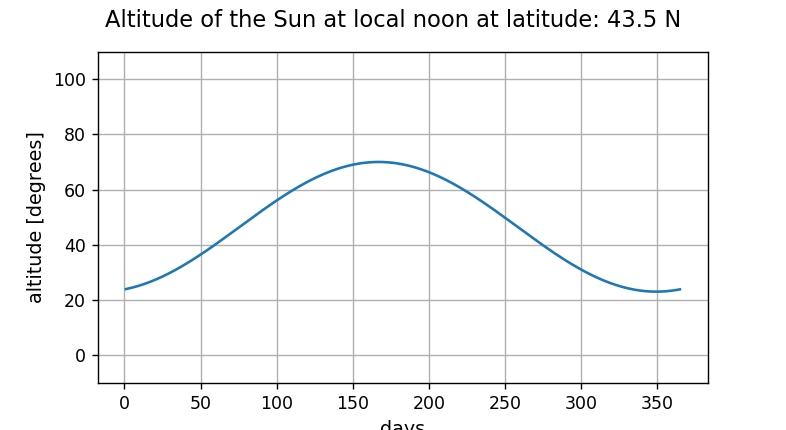

<IPython.core.display.Javascript object>


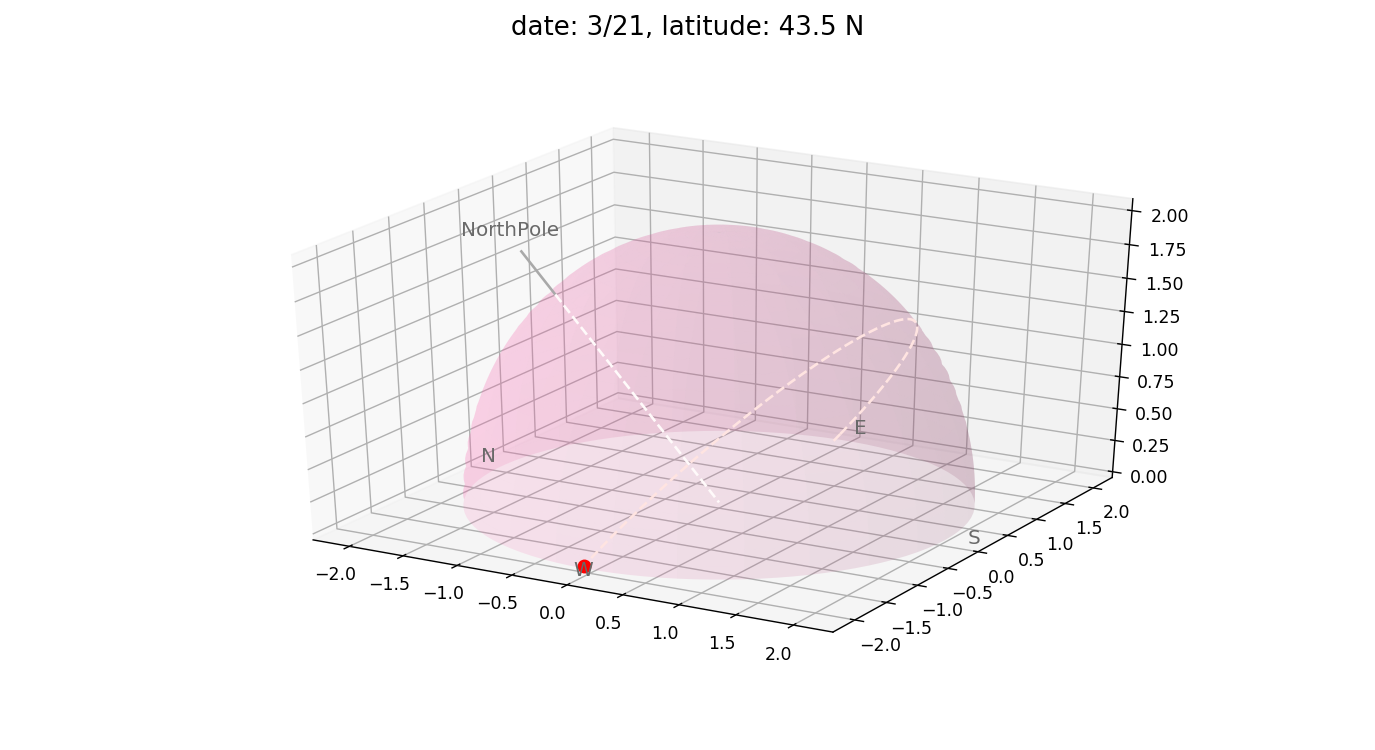

<IPython.core.display.Javascript object>


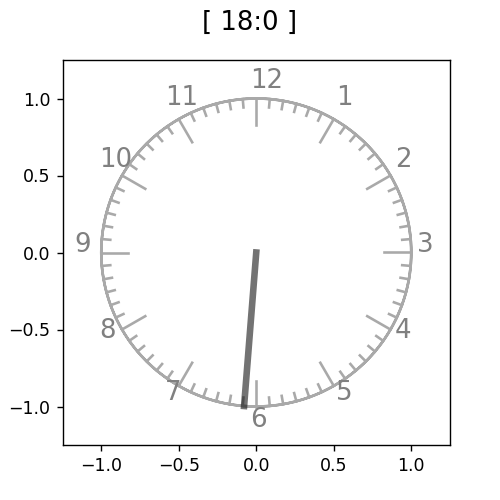

In [4]:
sunDial()

Enter the latitude [in degrees]: 12.3
Enter the date [in mm/dd form]: 6/30


<IPython.core.display.Javascript object>


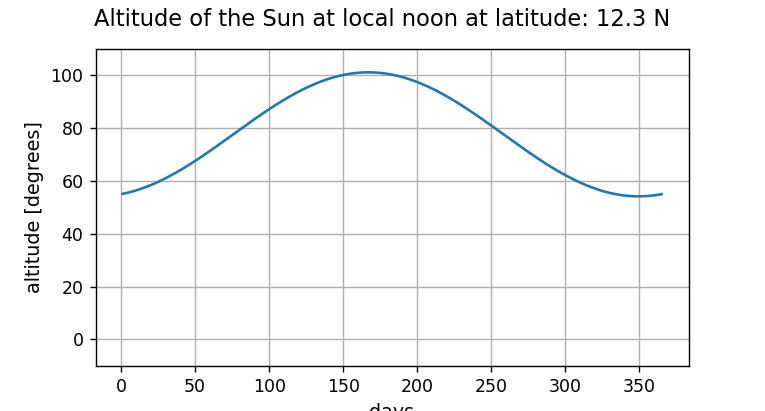

<IPython.core.display.Javascript object>


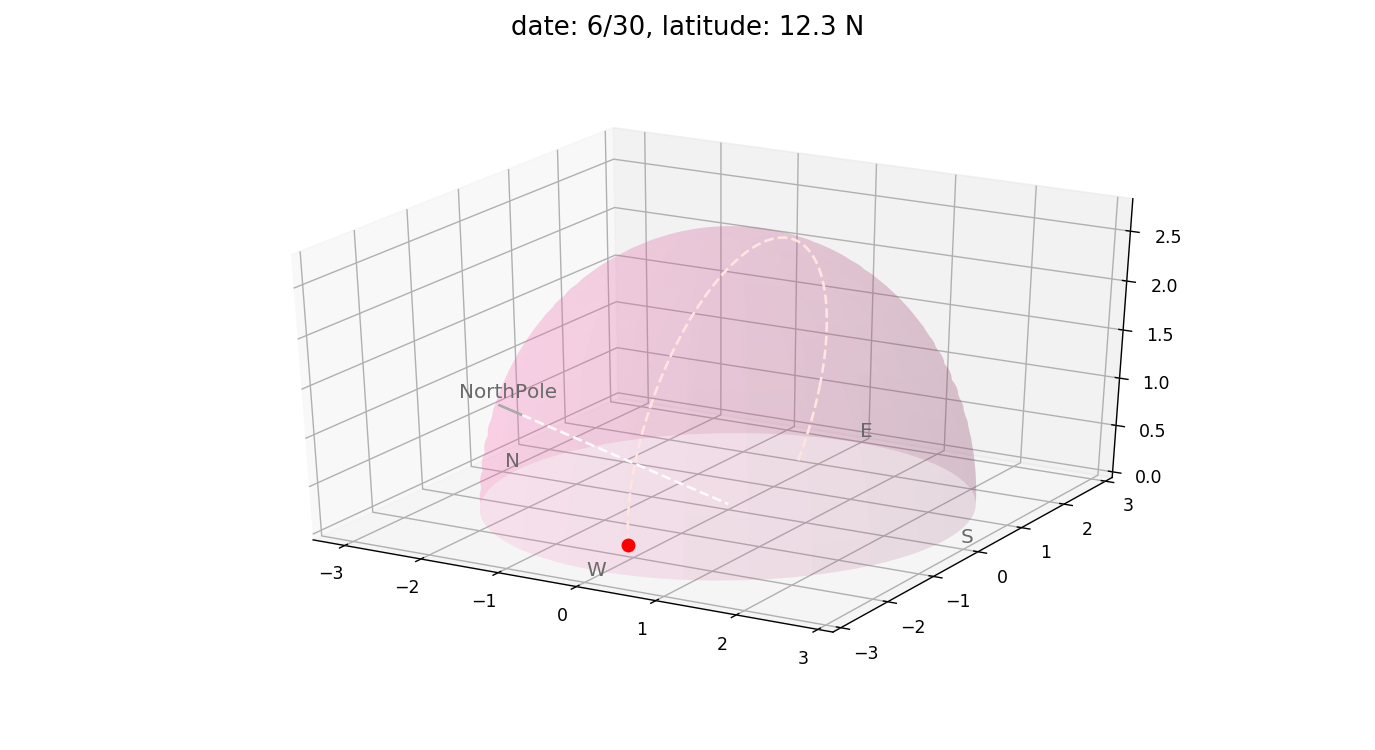

<IPython.core.display.Javascript object>


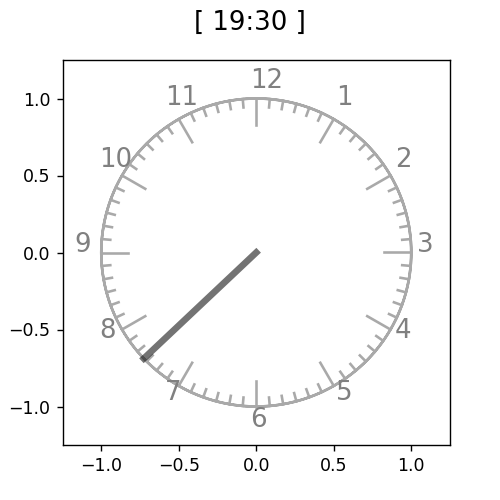

In [5]:
sunDial()

Enter the latitude [in degrees]: 55
Enter the date [in mm/dd form]: 10/1


<IPython.core.display.Javascript object>


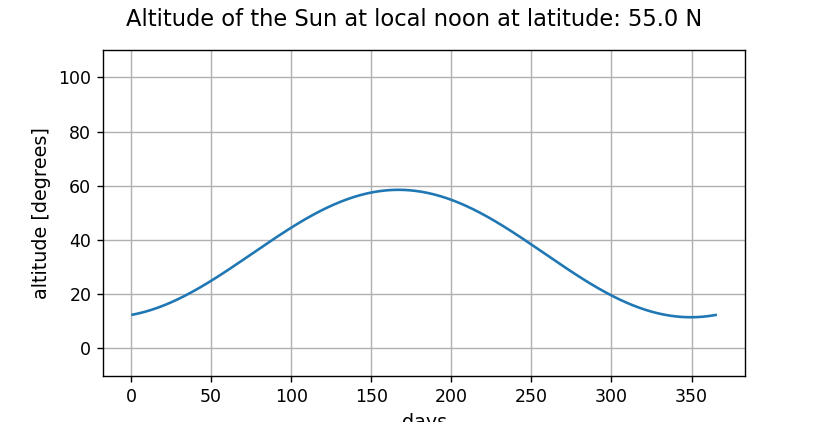

<IPython.core.display.Javascript object>


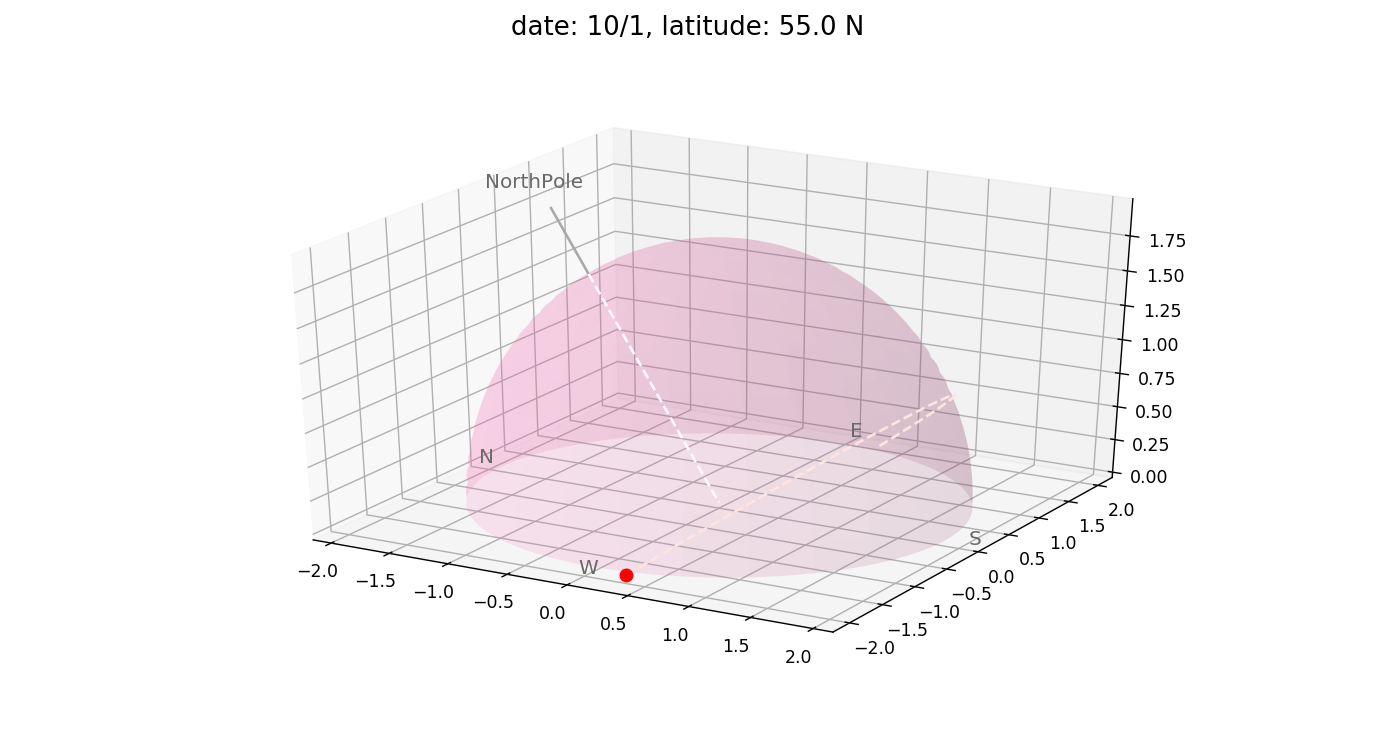

<IPython.core.display.Javascript object>


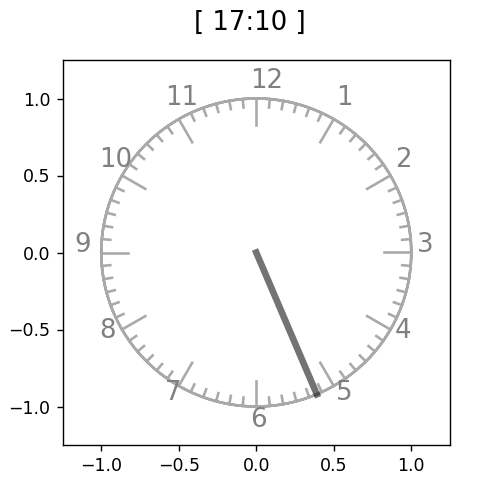

In [6]:
sunDial()

Enter the latitude [in degrees]: 83
Enter the date [in mm/dd form]: 07/02


<IPython.core.display.Javascript object>


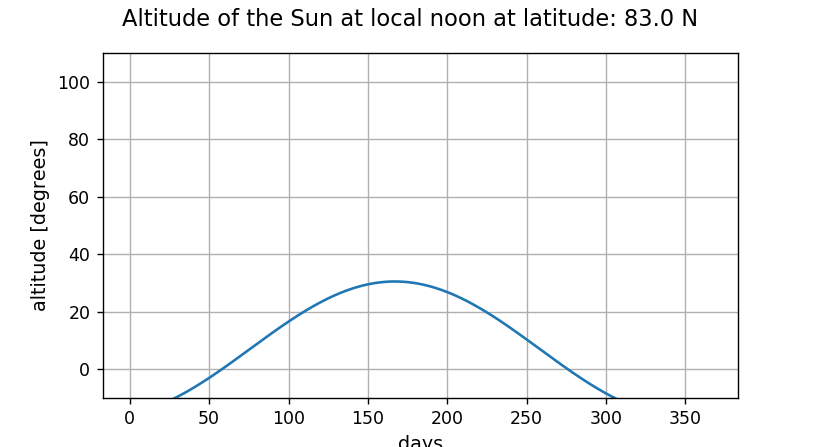

<IPython.core.display.Javascript object>


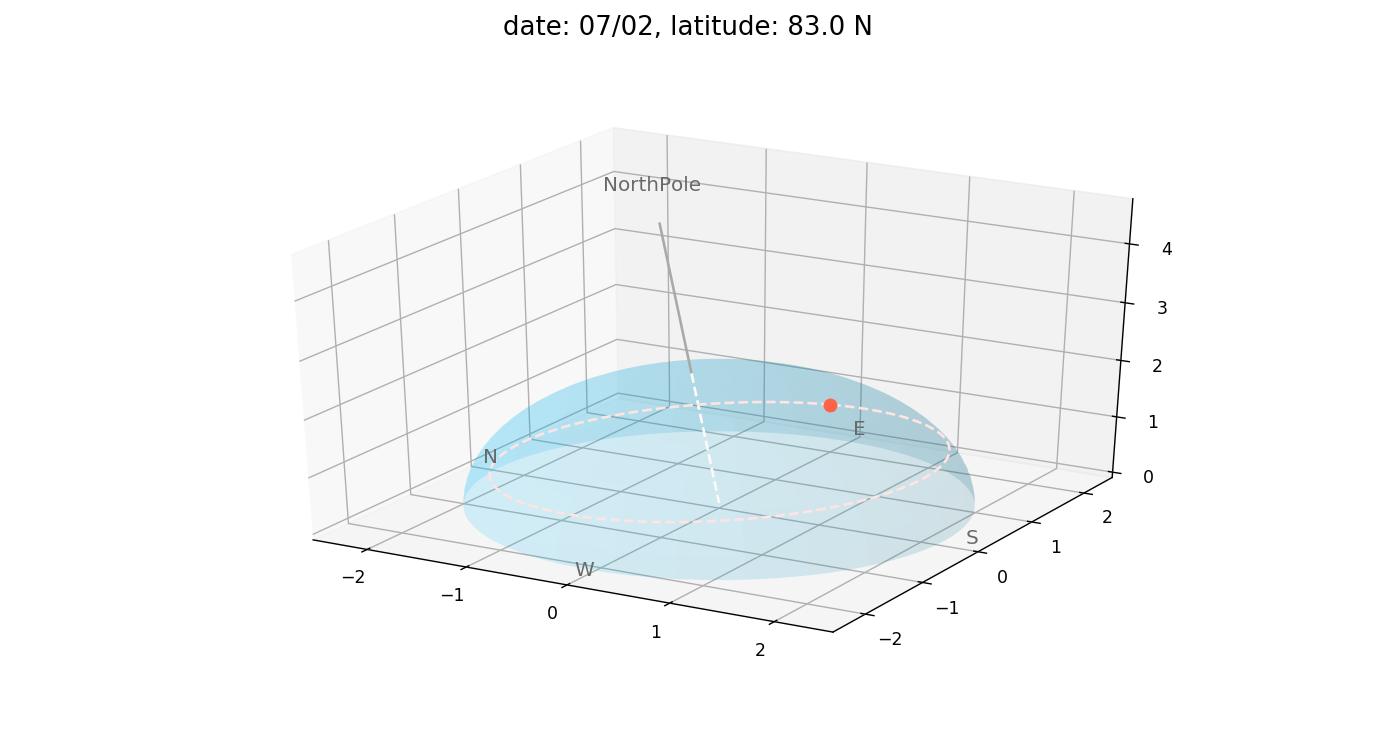

<IPython.core.display.Javascript object>


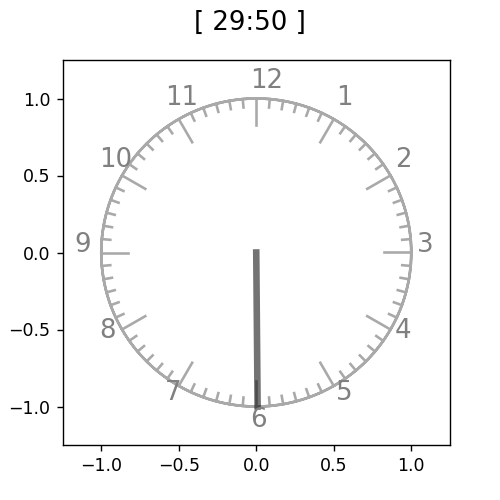

In [7]:
sunDial()